Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import random
import hashlib
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 1% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified notMNIST_large.tar.gz
Found and verified notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labelled A through J.

In [3]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

notMNIST_large already present - Skipping extraction of notMNIST_large.tar.gz.
['notMNIST_large\\A', 'notMNIST_large\\B', 'notMNIST_large\\C', 'notMNIST_large\\D', 'notMNIST_large\\E', 'notMNIST_large\\F', 'notMNIST_large\\G', 'notMNIST_large\\H', 'notMNIST_large\\I', 'notMNIST_large\\J']
notMNIST_small already present - Skipping extraction of notMNIST_small.tar.gz.
['notMNIST_small\\A', 'notMNIST_small\\B', 'notMNIST_small\\C', 'notMNIST_small\\D', 'notMNIST_small\\E', 'notMNIST_small\\F', 'notMNIST_small\\G', 'notMNIST_small\\H', 'notMNIST_small\\I', 'notMNIST_small\\J']


---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [4]:
#Answer for Problem 1
#Use the IPython.display.Image function to display a selection of the images.

#Import the random module so that a random sample of images/files can be taken
import random 

#Define a function to take a sample of images out of each image folder and display

def display_image(image_folder, sample_size):                       #Input the folder containing image folders (i.e. Test or Train folder)
    """Input the image folder directorey (Test_folder or Train_folders) and sample size of images to display per sub folder"""
    for folder in image_folder:                                     #Loop through each folder (e.g. A through J) in the train or test folder
        print("Sample from folder " + str(folder))                                               #Print the folder to be sampled e.g. A, B . .  J
        image_files = os.listdir(folder)                            #List the files (Image files) in the sub folder
        image_samples = random.sample(image_files, sample_size)     #Take a random sample of files/images from the sub folder
        for image in image_samples:                                 #Loop through the random sample of images
            print("Displaying image " + str(image))
            image_file = os.path.join(folder, image)                #Turn the image name into a full path
            i = Image(image_file)                                   #Run IPython Image on the image file
            display(i)                                              #Display the image from above
            


#Test display a sample of images
display(Image("notMNIST_large/A/a29ydW5pc2hpLnR0Zg==.png"), Image("notMNIST_large/C/aG9uZXkgVWx0cmEudHRm.png"),
        Image("notMNIST_large/B/a2FkZW4udHRm.png"))

In [5]:
#Run the display_image function on the training set.
display_image(train_folders, 1)

Sample from folder notMNIST_large\A
Displaying image Q0QtSWNvbnMudHRm.png


Sample from folder notMNIST_large\B
Displaying image RmFzdCBGb29kLnR0Zg==.png


Sample from folder notMNIST_large\C


Displaying image UXVheSBTYW5zIElUQyBTdGQgQmxhY2sub3Rm.png


Sample from folder notMNIST_large\D


Displaying image QXBvbGxvIE1UIFNlbWkgQm9sZC5wZmI=.png


Sample from folder notMNIST_large\E


Displaying image T3B0aW1hIENuLnR0Zg==.png


Sample from folder notMNIST_large\F
Displaying image Q29uZHVpdFNDSVRDLUV4dHJhQm9sZC5vdGY=.png


Sample from folder notMNIST_large\G
Displaying image R2FsbGVyeSBXaWRlIE5vcm1hbC50dGY=.png


Sample from folder notMNIST_large\H


Displaying image S3VlbnN0bGVyIDE2NSBIZWF2eS5wZmI=.png


Sample from folder notMNIST_large\I
Displaying image UmVhc29uIFNoYWRvdyBCUksudHRm.png


Sample from folder notMNIST_large\J
Displaying image QmVsbCBHb3RoaWMgQmxhY2sgQlQudHRm.png


In [6]:
#Run the display_image function on the Test_folders
display_image(test_folders, 1)

Sample from folder notMNIST_small\A
Displaying image SGFuIFNvbG8udHRm.png


Sample from folder notMNIST_small\B
Displaying image RWlkZXRpY05lby1Cb2xkLm90Zg==.png


Sample from folder notMNIST_small\C
Displaying image QmVya2VsZXkgT2xkc3R5bGUgSXRhbGljLnR0Zg==.png


Sample from folder notMNIST_small\D
Displaying image RmlyZWhvdXNlLnBmYg==.png


Sample from folder notMNIST_small\E
Displaying image Rm9ybXVsYS1NZWRpdW1JdGEub3Rm.png


Sample from folder notMNIST_small\F
Displaying image SGVsdmV0aWNhQ3lyLUJvbGQub3Rm.png


Sample from folder notMNIST_small\G
Displaying image Q29tc2F0LVVuaXQub3Rm.png


Sample from folder notMNIST_small\H
Displaying image RHJhZnRzbWFuIE5vcm1hbC50dGY=.png


Sample from folder notMNIST_small\I
Displaying image Q3VybHpNVFN0ZC1SZWd1bGFyLm90Zg==.png


Sample from folder notMNIST_small\J
Displaying image SGFuZGVsR290RC1MaWdoLm90Zg==.png


Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [7]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

notMNIST_large\A.pickle already present - Skipping pickling.
notMNIST_large\B.pickle already present - Skipping pickling.
notMNIST_large\C.pickle already present - Skipping pickling.
notMNIST_large\D.pickle already present - Skipping pickling.
notMNIST_large\E.pickle already present - Skipping pickling.
notMNIST_large\F.pickle already present - Skipping pickling.
notMNIST_large\G.pickle already present - Skipping pickling.
notMNIST_large\H.pickle already present - Skipping pickling.
notMNIST_large\I.pickle already present - Skipping pickling.
notMNIST_large\J.pickle already present - Skipping pickling.
notMNIST_small\A.pickle already present - Skipping pickling.
notMNIST_small\B.pickle already present - Skipping pickling.
notMNIST_small\C.pickle already present - Skipping pickling.
notMNIST_small\D.pickle already present - Skipping pickling.
notMNIST_small\E.pickle already present - Skipping pickling.
notMNIST_small\F.pickle already present - Skipping pickling.
notMNIST_small\G.pickle 

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

In [8]:
#Answer to Problem 2
#Use matplotlib.pyplot to check the data still looks good

#First create a function that takes a dataset and outputs a random sample of images from it.
#This function will take a random array out of each pickle file and display it with matplotlib pyplot

def data_plot(dataset):
    i=0                                                                             #Initialise the index for the image subplots as 0
    for data in dataset:                                                            #Loop through each pickle file (tensor) in the dataset
        with open(data, 'rb') as f:                                                 #Open the pickle file as read binary
            tensor = pickle.load(f)                                                 #Load the pickle file back into usable format (tensor)
            image_number = random.randint(0, len(tensor))                           #Select a random array/image number from the tensor length
            image = np.ndarray(shape=(image_size, image_size), dtype=np.float32)    #Initialise the image array as 28x28 array of floats
            image[:, :] = tensor[image_number, :, :]                                #Set image array numbers as the randomly selected tensor array numbers
            plt.subplot(2, 5, i+1)                                                  #Create a 2x5 grid of plots
            plt.axis('off')                                                         #No axis required for plot
            plt.imshow(image, cmap='Greys', interpolation='nearest')                #Plot array as image in greyscale to match earlier images
            f.close()                                                               #Close data file before looping to the next file
            i+=1                                                                    #Add 1 to the index for the next image

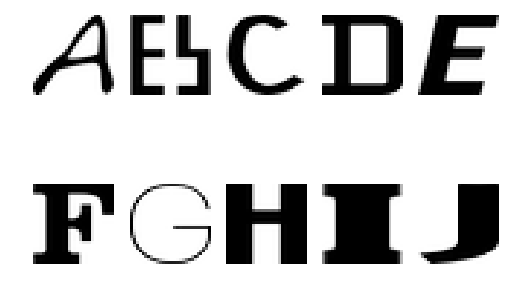

In [9]:
data_plot(train_datasets)

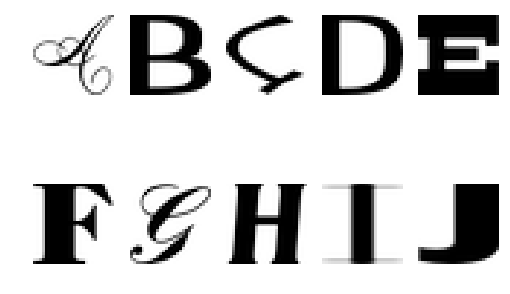

In [10]:
data_plot(test_datasets)

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [11]:
#Answer to problem 3
# The data is balance between classes if each class has a similar number of images.

def check_classes(dataset):
    for data in dataset:                                                            #Loop through each pickle file (tensor) in the dataset
        with open(data, 'rb') as f:                                                 #Open the pickle file as read binary
            tensor = pickle.load(f)                                                 #Load the pickle file back into usable format (tensor)
            print('Class ', data, 'has ', len(tensor), 'images', '\n')                    #Print the length (number of images) of each class
            f.close()                                                               #Close file before looping to the next

In [12]:
#Run the check_classes function to print out the length of each class

check_classes(train_datasets)

check_classes(test_datasets)

Class  notMNIST_large\A.pickle has  52909 images 

Class  notMNIST_large\B.pickle has  52911 images 



Class  notMNIST_large\C.pickle has  52912 images 

Class  notMNIST_large\D.pickle has  52911 images 



Class  notMNIST_large\E.pickle has  52912 images 

Class  notMNIST_large\F.pickle has  52912 images 



Class  notMNIST_large\G.pickle has  52912 images 

Class  notMNIST_large\H.pickle has  52912 images 



Class  notMNIST_large\I.pickle has  52912 images 

Class  notMNIST_large\J.pickle has  52911 images 

Class  notMNIST_small\A.pickle has  1872 images 

Class  notMNIST_small\B.pickle has  1873 images 

Class  notMNIST_small\C.pickle has  1873 images 

Class  notMNIST_small\D.pickle has  1873 images 

Class  notMNIST_small\E.pickle has  1873 images 

Class  notMNIST_small\F.pickle has  1872 images 



Class  notMNIST_small\G.pickle has  1872 images 

Class  notMNIST_small\H.pickle has  1872 images 

Class  notMNIST_small\I.pickle has  1872 images 

Class  notMNIST_small\J.pickle has  1872 images 



Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [13]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [14]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

To check the dataset and labels I display a random image with its label and check they look right and are correctly labeled.

In [45]:
#Answer to Problem 4
#Use matplotlib.pyplot to check the data still looks good

#Create a dictionary which converts the lable number into the respective letter

corrected_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}

#First create a function that takes a dataset and outputs a random sample of images from it with the appropriate label.

def display_sample_dataset(dataset, labels):
    image_no=random.sample(range(len(labels)), 10)                              #Take a random sample of 10 numbers from the length of the labels array 
    for i, image_no in enumerate(image_no):                                     #Loop through the random sample of numbers
        plt.subplot(2, 5, i+1)                                                  #Create a 2x5 grid of plots
        plt.axis('off')                                                         #No axis required for plot
        plt.title(corrected_labels[labels[image_no]])                           #Set the title of each subplot as the label
        plt.imshow(dataset[image_no], cmap='Greys', interpolation='nearest')    #Plot array as image in greyscale to match earlier images

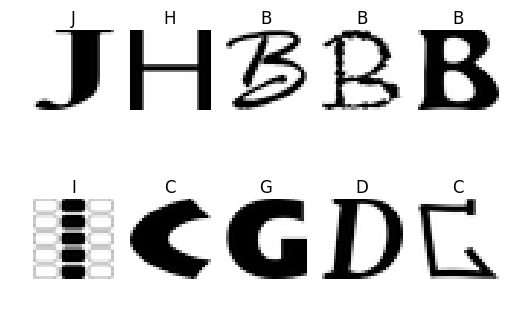

In [16]:
display_sample_dataset(train_dataset, train_labels)

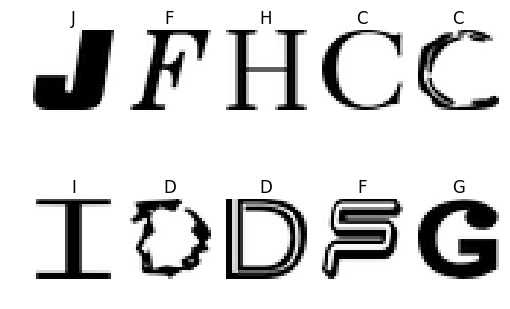

In [17]:
display_sample_dataset(valid_dataset, valid_labels)

Finally, let's save the data for later reuse:

In [18]:
pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [19]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800512


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [2]:
#Load the data from the pickle file first
all_data = pickle.load(open('notMNIST.pickle', 'rb'))

#Set datasets based on saved pickle file datasets
train_dataset = all_data['train_dataset']
train_labels = all_data['train_labels']
test_dataset = all_data['test_dataset']
test_labels = all_data['test_labels']
valid_dataset = all_data['valid_dataset']
valid_labels = all_data['valid_labels']

#Define function to display overlap images from datasets
def display_overlap(overlap, source_dataset, target_dataset):
  items = list(overlap.keys())
  item = random.choice(items)
  imgs = np.concatenate(([source_dataset[item]], target_dataset[overlap[item][0:7]]))
  plt.suptitle(item)
  for i, img in enumerate(imgs):
    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(img, cmap='Greys', interpolation='nearest')

#Try using hash function to find duplicates in datasets

import hashlib

def extract_overlap_hash_where(dataset_1, dataset_2):
  dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
  dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
  overlap = {}
  for i, hash1 in enumerate(dataset_hash_1):
    duplicates = np.where(dataset_hash_2 == hash1)
    if len(duplicates[0]):
      overlap[i] = duplicates[0]
  return overlap

In [5]:
#Try timing the various duplicate check fucntions
overlap_test_train = extract_overlap_hash_where(test_dataset[:200], train_dataset)

Number of overlaps: 24


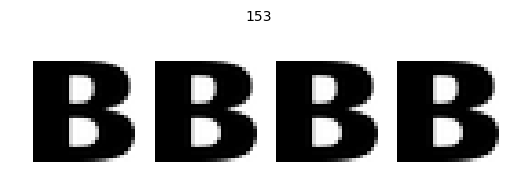

In [6]:
print('Number of overlaps:', len(overlap_test_train.keys()))
display_overlap(overlap_test_train, test_dataset[:200], train_dataset)

In [15]:
#Try making function to check for similar images
from skimage.measure import compare_ssim as ssim

In [7]:
#Try using another hash function to be faster. MD5 hash instead of sha256
def extract_overlap_hashmd_where(dataset_1, dataset_2):
  dataset_hash_1 = np.array([hashlib.md5(img).hexdigest() for img in dataset_1])
  dataset_hash_2 = np.array([hashlib.md5(img).hexdigest() for img in dataset_2])
  overlap = {}
  for i, hash1 in enumerate(dataset_hash_1):
    duplicates = np.where(dataset_hash_2 == hash1)
    if len(duplicates[0]):
      overlap[i] = duplicates[0]
  return overlap

In [8]:
overlap_test_train = extract_overlap_hashmd_where(test_dataset[:200], train_dataset)

Number of overlaps: 24


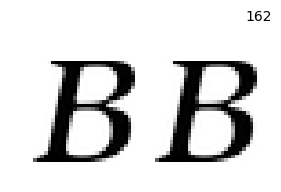

In [9]:
print('Number of overlaps:', len(overlap_test_train.keys()))
display_overlap(overlap_test_train, test_dataset[:200], train_dataset)

In [10]:
#Same number of hashes were found as SHA256 hash, but appears to be quicker.

#Check how many collisions are in the full and other datasets
overlap_test_train = extract_overlap_hashmd_where(test_dataset, train_dataset)
print('Number of overlaps test to train:', len(overlap_test_train.keys()))

Number of overlaps test to train: 1324


In [12]:
#Check when reversing the input datasets the result
overlap_test_train = extract_overlap_hashmd_where(train_dataset, test_dataset)
print('Number of overlaps train to test:', len(overlap_test_train.keys()))

Number of overlaps train to test: 3622


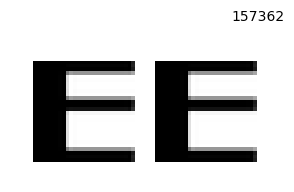

In [13]:
display_overlap(overlap_test_train, train_dataset, test_dataset)

In [28]:
overlap_test_train = extract_overlap_hashmd_where(valid_dataset, train_dataset)
print('Number of overlaps valid to train:', len(overlap_test_train.keys()))

Number of overlaps valid to train: 1067


In [27]:
#Define function to sanitise the datasets removing duplicates
def sanetize(dataset_1, dataset_2, labels_1):
  dataset_hash_1 = np.array([hashlib.md5(img).hexdigest() for img in dataset_1])
  dataset_hash_2 = np.array([hashlib.md5(img).hexdigest() for img in dataset_2])
  overlap = [] # list of indexes
  for i, hash1 in enumerate(dataset_hash_1):
    duplicates = np.where(dataset_hash_2 == hash1)
    if len(duplicates[0]):
      overlap.append(i) 
  return np.delete(dataset_1, overlap, 0), np.delete(labels_1, overlap, None)

In [36]:
#Create sanitised test and validation data sets
#Start with the test dataset
test_dataset_sanit, test_labels_sanit = sanetize(test_dataset, train_dataset, test_labels)
print('Overlapping images removed: ', len(test_dataset) - len(test_dataset_sanit))

Overlapping images removed:  1324


In [38]:
print(np.shape(test_dataset_sanit))

(8676, 28, 28)


In [39]:
#Sanitise the validation dataset
valid_dataset_sanit, valid_labels_sanit = sanetize(valid_dataset, train_dataset, valid_labels)
print('Overlapping images removed: ', len(valid_dataset) - len(valid_dataset_sanit))

Overlapping images removed:  1067


In [40]:
print(np.shape(valid_dataset_sanit))

(8933, 28, 28)


In [41]:
#Save the sanitised datasets for later use in modelling
pickle_file_sanit = 'notMNIST_sanit.pickle'

try:
  f = open(pickle_file_sanit, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset_sanit,
    'valid_labels': valid_labels_sanit,
    'test_dataset': test_dataset_sanit,
    'test_labels': test_labels_sanit,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [42]:
#Display the size of the saved pickle file of sanitised datasets
statinfo = os.stat(pickle_file_sanit)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 683292772


---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [52]:
#Use linear regression model from Scikit learn checking the accuracy from 50, 100, 1000, 5000
#and full training data

regr = LogisticRegression()
X_test = test_dataset_sanit.reshape(test_dataset_sanit.shape[0], 28 * 28)
y_test = test_labels_sanit

In [53]:
#Try training with 50 samples and look at accuracy
sample_size = 50
X_train = train_dataset[:sample_size].reshape(sample_size, 784)
y_train = train_labels[:sample_size]
%time regr.fit(X_train, y_train)
regr.score(X_test, y_test)

Wall time: 46 ms


0.49619640387275243

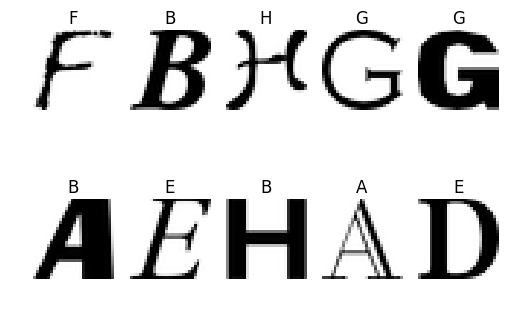

In [54]:
pred_labels = regr.predict(X_test)
display_sample_dataset(test_dataset_sanit, pred_labels)

In [55]:
#Try training with 100 samples and look at accuracy
sample_size = 100
X_train = train_dataset[:sample_size].reshape(sample_size, 784)
y_train = train_labels[:sample_size]
%time regr.fit(X_train, y_train)
regr.score(X_test, y_test)

Wall time: 119 ms


0.68303365606270172

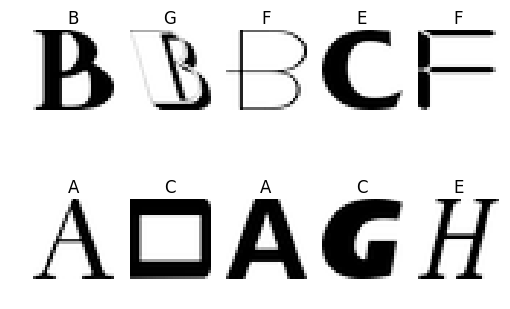

In [56]:
pred_labels = regr.predict(X_test)
display_sample_dataset(test_dataset_sanit, pred_labels)

In [57]:
#Try training with 500 samples and look at accuracy
sample_size = 500
X_train = train_dataset[:sample_size].reshape(sample_size, 784)
y_train = train_labels[:sample_size]
%time regr.fit(X_train, y_train)
regr.score(X_test, y_test)

Wall time: 1.11 s


0.82065467957584137

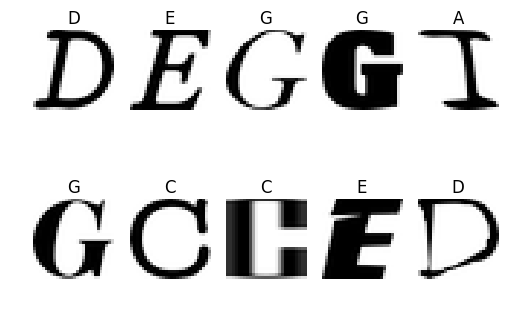

In [58]:
pred_labels = regr.predict(X_test)
display_sample_dataset(test_dataset_sanit, pred_labels)

In [59]:
#Try training with 1000 samples and look at accuracy
sample_size = 1000
X_train = train_dataset[:sample_size].reshape(sample_size, 784)
y_train = train_labels[:sample_size]
%time regr.fit(X_train, y_train)
regr.score(X_test, y_test)

Wall time: 2.64 s


0.82019363762102349

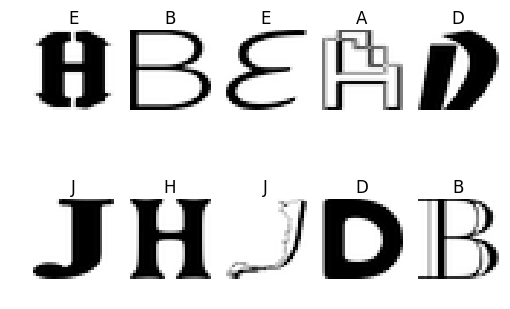

In [60]:
pred_labels = regr.predict(X_test)
display_sample_dataset(test_dataset_sanit, pred_labels)

In [61]:
#Try training with 5000 samples and look at accuracy
sample_size = 5000
X_train = train_dataset[:sample_size].reshape(sample_size, 784)
y_train = train_labels[:sample_size]
%time regr.fit(X_train, y_train)
regr.score(X_test, y_test)

Wall time: 21.8 s


0.83863531581373907

In [64]:
#Try training with ALL samples and look at accuracy
sample_size = len(train_dataset)
X_train = train_dataset[:sample_size].reshape(sample_size, 784)
y_train = train_labels[:sample_size]
%time regr.fit(X_train, y_train)
regr.score(X_test, y_test)

Wall time: 27min 15s


0.88301060396496078

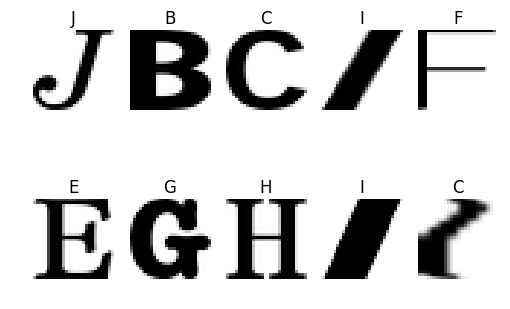

In [65]:
pred_labels = regr.predict(X_test)
display_sample_dataset(test_dataset_sanit, pred_labels)